in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "1kf1"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [6]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(0.720, 0.740, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

100%|██████████| 51/51 [00:26<00:00,  1.90it/s]


Text(0, 0.5, 'volume')

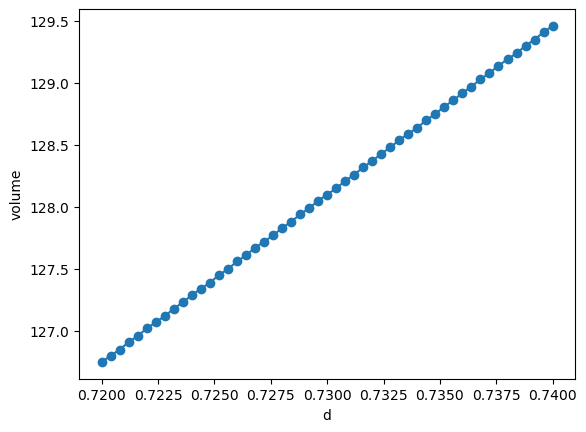

In [7]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3854**

In [29]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(0.7287, 0.72925, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|██████████| 51/51 [00:43<00:00,  1.17it/s]


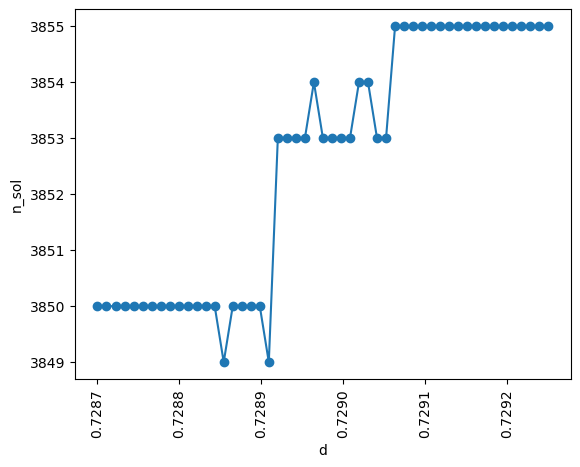

In [30]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [31]:
d2n_sol

{0.7287: 3850,
 0.728711: 3850,
 0.728722: 3850,
 0.728733: 3850,
 0.728744: 3850,
 0.728755: 3850,
 0.728766: 3850,
 0.728777: 3850,
 0.728788: 3850,
 0.728799: 3850,
 0.72881: 3850,
 0.728821: 3850,
 0.728832: 3850,
 0.728843: 3850,
 0.728854: 3849,
 0.728865: 3850,
 0.728876: 3850,
 0.728887: 3850,
 0.728898: 3850,
 0.728909: 3849,
 0.72892: 3853,
 0.728931: 3853,
 0.728942: 3853,
 0.728953: 3853,
 0.728964: 3854,
 0.728975: 3853,
 0.728986: 3853,
 0.728997: 3853,
 0.729008: 3853,
 0.729019: 3854,
 0.72903: 3854,
 0.729041: 3853,
 0.729052: 3853,
 0.729063: 3855,
 0.729074: 3855,
 0.729085: 3855,
 0.729096: 3855,
 0.729107: 3855,
 0.729118: 3855,
 0.729129: 3855,
 0.72914: 3855,
 0.729151: 3855,
 0.729162: 3855,
 0.729173: 3855,
 0.729184: 3855,
 0.729195: 3855,
 0.729206: 3855,
 0.729217: 3855,
 0.729228: 3855,
 0.729239: 3855,
 0.72925: 3855}